# Pandas Groupby & Aggregates

In [1]:
import pandas as pd

In [7]:
carstocks = pd.read_csv("data/car_stocks.csv",parse_dates=['Date'])

In [8]:
carstocks.head()

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,RIVN,2021-11-10,106.750000,119.459999,95.199997,100.730003,100.730003,103679500
1,RIVN,2021-11-11,114.625000,125.000000,108.010002,122.989998,122.989998,83668200
2,RIVN,2021-11-12,128.645004,135.199997,125.250000,129.949997,129.949997,50437500
3,RIVN,2021-11-15,130.800003,152.529999,127.510002,149.360001,149.360001,64982300
4,RIVN,2021-11-16,163.800003,179.470001,153.779999,172.009995,172.009995,94036600


In [9]:
carstocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Symbol     39 non-null     object        
 1   Date       39 non-null     datetime64[ns]
 2   Open       39 non-null     float64       
 3   High       39 non-null     float64       
 4   Low        39 non-null     float64       
 5   Close      39 non-null     float64       
 6   Adj Close  39 non-null     float64       
 7   Volume     39 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.6+ KB


In [12]:
carstocks['Close'].mean()

79.83897420512822

In [13]:
carstocks[carstocks['Symbol'] == 'RIVN']['Close'].mean()

127.52307653846154

In [14]:
carstocks[carstocks['Symbol'] == 'RIVN']['Close'].mean()
carstocks[carstocks['Symbol'] == 'GM']['Close'].mean()

62.16461546153845

In [15]:
carstocks.groupby('Symbol')['Close'].mean()

Symbol
GM       62.164615
LCID     49.829231
RIVN    127.523077
Name: Close, dtype: float64

In [16]:
titanic = pd.read_csv("data/titanic.csv")
titanic['age'] = titanic["age"].replace(['?'], [None]).astype('float')

In [18]:
df = titanic[['pclass','survived','sex','age']]

In [21]:
gbo = df.groupby(by='sex')

In [22]:
gbo

In [24]:
gbo.ngroups

2

In [25]:
gbo.groups

{'female': [0, 2, 4, 6, 8, 11, 12, 13, 17, 18, 21, 23, 24, 27, 28, 32, 33, 35, 36, 41, 42, 43, 44, 48, 50, 55, 57, 59, 61, 63, 65, 66, 67, 69, 72, 73, 76, 78, 79, 82, 83, 85, 88, 90, 92, 95, 97, 98, 99, 102, 103, 104, 105, 107, 108, 111, 112, 113, 116, 117, 121, 122, 124, 127, 129, 130, 131, 134, 137, 139, 141, 144, 146, 149, 153, 155, 159, 160, 161, 163, 167, 168, 169, 176, 178, 180, 181, 182, 186, 187, 188, 190, 192, 193, 195, 198, 199, 204, 207, 208, ...], 'male': [1, 3, 5, 7, 9, 10, 14, 15, 16, 19, 20, 22, 25, 26, 29, 30, 31, 34, 37, 38, 39, 40, 45, 46, 47, 49, 51, 52, 53, 54, 56, 58, 60, 62, 64, 68, 70, 71, 74, 75, 77, 80, 81, 84, 86, 87, 89, 91, 93, 94, 96, 100, 101, 106, 109, 110, 114, 115, 118, 119, 120, 123, 125, 126, 128, 132, 133, 135, 136, 138, 140, 142, 143, 145, 147, 148, 150, 151, 152, 154, 156, 157, 158, 162, 164, 165, 166, 170, 171, 172, 173, 174, 175, 177, 179, 183, 184, 185, 189, 191, ...]}

In [26]:
df.groupby(by='age').ngroups

98

In [27]:
gbo.get_group("male")

,pclass,survived,sex,age
1,1,1,male,0.9167
3,1,0,male,30.0000
5,1,1,male,48.0000
7,1,0,male,39.0000
9,1,0,male,71.0000
...,...,...,...,...
1302,3,0,male,NaN
1303,3,0,male,NaN
1306,3,0,male,26.5000
1307,3,0,male,27.0000


In [31]:
gbo['age'].mean()

sex
female    28.687071
male      30.585233
Name: age, dtype: float64

In [32]:
gbo['age'].max()

sex
female    76.0
male      80.0
Name: age, dtype: float64

<AxesSubplot:title={'center':'Avg age by sex'}, xlabel='sex'>

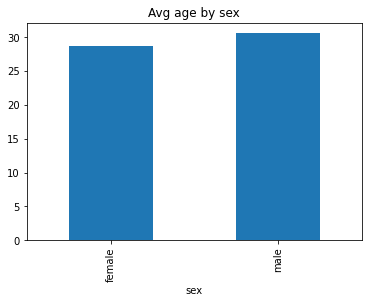

In [35]:
gbo['age'].mean().plot(kind='bar',title='Avg age by sex')

In [36]:
titanic.groupby('pclass')['age'].mean()

pclass
1    39.159918
2    29.506705
3    24.816367
Name: age, dtype: float64

In [37]:
titanic.groupby('pclass')['age'].max()

pclass
1    80.0
2    70.0
3    74.0
Name: age, dtype: float64

In [40]:
titanic.groupby('pclass')['age'].median()

pclass
1    39.0
2    29.0
3    24.0
Name: age, dtype: float64

In [41]:
titanic.groupby('sex')['pclass'].mean()

sex
female    2.154506
male      2.372479
Name: pclass, dtype: float64

In [42]:
titanic.groupby('sex').mean()

,pclass,survived,age,sibsp,parch
sex,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047
male,2.372479,0.190985,30.585233,0.413998,0.247924


In [43]:
carstocks.groupby("Symbol")['High'].max()

Symbol
GM       65.180000
LCID     57.750000
RIVN    179.470001
Name: High, dtype: float64

In [44]:
titanic.groupby('sex')['age'].agg('min')

sex
female    0.1667
male      0.3333
Name: age, dtype: float64

In [45]:
titanic.groupby('sex')['age'].agg(['min','max'])

,min,max
sex,,
female,0.1667,76.0
male,0.3333,80.0


In [46]:
titanic.groupby('sex').agg({"age":['min','max'],"pclass":"mean"})

age          pclass
           min   max      mean
sex                           
female  0.1667  76.0  2.154506
male    0.3333  80.0  2.372479

In [48]:
carstocks.groupby("Symbol").agg({'Open':"mean","Close":"mean","Volume":['mean','sum']})

Open       Close        Volume            
              mean        mean          mean         sum
Symbol                                                  
GM       61.937693   62.164615  2.025259e+07   263283700
LCID     48.761538   49.829231  1.081098e+08  1405427200
RIVN    127.710000  127.523077  5.252395e+07   682811400

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.225,?,C,?,?,?


In [58]:
def range(s):
    return s.max() - s.min()

In [59]:
titanic.groupby('pclass')['age'].agg(range)

pclass
1    79.0833
2    69.3333
3    73.8333
Name: age, dtype: float64

In [61]:
titanic.groupby('pclass')['age'].agg(['min','max',range])

,min,max,range
pclass,,,
1,0.9167,80.0,79.0833
2,0.6667,70.0,69.3333
3,0.1667,74.0,73.8333


In [62]:
titanic['age'].size #number of rows in age

1309

In [66]:
titanic['age'].count() #no. of rows without null values

1046

In [67]:
titanic['age'].size - titanic['age'].count()

263

In [68]:
def count_null(s):
    return s.size - s.count()

In [69]:
titanic.groupby('pclass')['age'].agg(count_null)

pclass
1     39
2     16
3    208
Name: age, dtype: int64